# Team Members
- 22127148 - Dương Nhật Huy
- 22127224 - Trương Thuận Kiệt
- 22127257 - Phạm Minh Mẫn

# Table of contents
1. [Libraries](#libraries)
2. [Overview of dataset](#overview-of-dataset)
3. [Preprocessing data](#preprocessing)
4. [Questions](#questions)
    - [Question 1](#question-1)
    - [Question 2](#question-2)
    - [Question 3](#question-3)
5. [Conclusion](#conclusion)
    - [Difficulties during the project](#difficulties)
    - [Useful things learned](#useful)
    - [Plans to improve if have more time](#plans)
6. [References](#references)


<div id = "libraries">
<h2>1. Libraries</h2>
<p>Import necessary libraries to use</p> 
</div>

In [702]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [703]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import  DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

<div id="overview-of-dataset"> <h2>2. Overview of dataset</h2> </div>
Provide an overview of the dataset.

In [704]:
data = pd.read_csv('./Data/healthcare-dataset-stroke-data.csv')

In [705]:
data.head() 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<h3> Number of rows and cols </h3>

In [706]:
print("Number of rows: ", len(data))

Number of rows:  5110


In [707]:
print("Number of columns: ", len(data.columns))

Number of columns:  12


<h3> Meaning of each row </h3>

Each row will represent each patient's medical record of stroke with some features relating to that patient.

After looking into the entire data of file csv, it can be seen there are no abnormal rows.

<h3> Duplicated rows </h3>

In [708]:
duplicate_rows = data[data.duplicated()]
duplicate_rows

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


So can be seen that there is no duplicates

<h3> Meaning of each column </h3>

In [709]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- Here is the description of each column:
    - **id**: id of each patient
    - **gender**: each patient's gender can be male, female and other
    - **age**: how old is each patient
    - **hypertension**: when the pressure in blood is too high
    - **heart_disease**:  when the patient have disease relates to heart
    - **ever_married**: whether the patient is or used to be married
    - **work_type**: the job status of the patient
    - **Residence_type**: the area that patients live
    - **avg_glucose_level**: the level of sugar in the blood
    - **bmi**: measure of body fat based on height and weight
    - **smoking_status**: whether the patient is smoking or not
    - **stroke**: whether the patient got stroke or not

- Unique values and value range of each column

In [710]:
# Unique values in each column
print("Unique values of gender: ", data['gender'].unique())
print("Unique values of hypertension: ", data['hypertension'].unique())
print("Unique values of heart_disease: ", data['heart_disease'].unique())
print("Unique values of ever_married: ", data['ever_married'].unique())
print("Unique values of work_type: ", data['work_type'].unique())
print("Unique values of Residence_type: ", data['Residence_type'].unique())
print("Unique values of smoking_status: ", data['smoking_status'].unique())
print("Unique values of stroke: ", data['stroke'].unique())

Unique values of gender:  ['Male' 'Female' 'Other']
Unique values of hypertension:  [0 1]
Unique values of heart_disease:  [1 0]
Unique values of ever_married:  ['Yes' 'No']
Unique values of work_type:  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique values of Residence_type:  ['Urban' 'Rural']
Unique values of smoking_status:  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Unique values of stroke:  [1 0]


- So we can see unique values of each column:
    - **gender**: Male, Female, Other
    - **heart_disease**: 0: No, 1: Yes
    - **ever_married**: Yes, No
    - **work_type**: Private, Self-employed, Govt_job, children, Never_worked
    - **Residence_type**: Urban, Rural
    - **smoking_status**: formerly smoked, never smoked, smokes, Unknown
    - **stroke**: 1: Yes, 0: No

In [711]:
# Range values of age, avg_glucose_level, bmi
print("Range of age: ", data['age'].min(), " - ", data['age'].max())
print("Range of avg_glucose_level: ", data['avg_glucose_level'].min(), " - ", data['avg_glucose_level'].max())
print("Range of bmi: ", data['bmi'].min(), " - ", data['bmi'].max())

Range of age:  0.08  -  82.0
Range of avg_glucose_level:  55.12  -  271.74
Range of bmi:  10.3  -  97.6


- Range values:
    - **age**: 0.08-82.0
    - **avg_glucose_level**: 55.12 - 271.74
    - **bmi**: 10.3 - 97.6

=> As we see, age value got float values and needs to be corrected to integer in Data Processing

<h3>Current data type of each column</h3>

In [712]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


- Look like all data type of each column is correct, except from age type is currently float

<h3>Checking null values</h3>

In [713]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

- Luckily as can be seen, only bmi column has null values

### NUMERICAL COLUMNS EXPLORATION

###   Missing data

- As can be from the above information, only bmi has the null values, so let have a look at it

In [714]:
#List out elements in bmi column
numerical = ['bmi']
data[numerical]

,bmi
0,36.6
1,NaN
2,32.5
3,34.4
4,24.0
...,...
5105,NaN
5106,40.0
5107,30.6
5108,25.6


In [715]:

null = data[data['bmi'].isnull()]
non_null = data[data['bmi'].notnull()]

from scipy.stats import ttest_ind

for col in data.columns:
    if (data[col].dtype == 'float64' or data[col].dtype == 'int64') and (col != 'bmi' and col != 'id'):
        t_stat, p_value = ttest_ind(null[col].dropna(), non_null[col].dropna(), equal_var=False)
        print("\nT-test results for", col, "between groups:")
        print("t-statistic:", t_stat)
        print("p-value:", p_value)


for col in data.columns:
    if data[col].dtype == 'object' and col != 'bmi':
        print("\nMissing 'bmi' by", col, ":")
        print(data.groupby(col)['bmi'].apply(lambda x: x.isnull().sum()))



T-test results for age between groups:
t-statistic: 5.725978410349808
p-value: 3.397736416677071e-08

T-test results for hypertension between groups:
t-statistic: 4.698744140096242
p-value: 4.759849351086857e-06

T-test results for heart_disease between groups:
t-statistic: 4.347777190024152
p-value: 2.1625306918478056e-05

T-test results for avg_glucose_level between groups:
t-statistic: 5.068112430827461
p-value: 8.816698412059382e-07

T-test results for stroke between groups:
t-statistic: 5.512357794686704
p-value: 1.0614185880641118e-07

Missing 'bmi' by gender :
gender
Female     97
Male      104
Other       0
Name: bmi, dtype: int64

Missing 'bmi' by ever_married :
ever_married
No      52
Yes    149
Name: bmi, dtype: int64

Missing 'bmi' by work_type :
work_type
Govt_job          27
Never_worked       0
Private          114
Self-employed     44
children          16
Name: bmi, dtype: int64

Missing 'bmi' by Residence_type :
Residence_type
Rural     95
Urban    106
Name: bmi, dtyp

- In terms of numerical columns, since there are statistically significant differences in these features, this strongly suggests that the missingness of bmi is **Missing at Random (MAR)** rather than Missing Completely at Random (MCAR). This means that missing bmi values are likely associated with other variables, such as age, hypertension, heart disease, glucose levels, and stroke occurrence
- In terms of categorical columns, the missingness of bmi appears to follow a **MAR (Missing at Random)** pattern for certain categorical variables

#### Percentage of missing value

In [716]:
#What is the percentage of missing value
for col in numerical:
    missing_rate = (data[col].isna().sum() / len(data[col]))*100
    print( f'{col}: {missing_rate}%')

bmi: 3.9334637964774952%


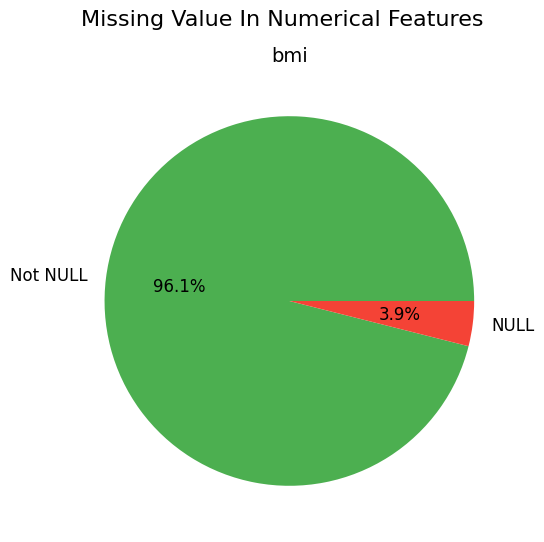

In [717]:
fig, ax = plt.subplots(1, len(numerical), figsize=(15, 5)) if len(numerical) > 1 else (plt.subplots(1, 1, figsize=(6, 6)))
ax = [ax] if len(numerical) == 1 else ax 

for i in range(len(numerical)):
    ax_i = ax[i]
    missing_count = data[numerical[i]].isnull().value_counts().reindex([False, True], fill_value=0)
    
    wedges, texts, autotexts = ax_i.pie(
        missing_count, 
        labels=['Not NULL', 'NULL'], 
        autopct='%1.1f%%', 
        colors=['#4CAF50', '#F44336']
    )

    for text in texts:
        text.set_fontsize(12)
    for autotext in autotexts:
        autotext.set_fontsize(12)

    ax_i.set_title(numerical[i], fontsize=14)

plt.suptitle("Missing Value In Numerical Features", fontsize=16)
plt.subplots_adjust(wspace=0.5)
plt.show()

- Fortunately, the percentage of null values in the bmi column is not very high, which means that handling these missing values should not drastically impact the dataset's integrity or size

<h4> Helper Function </h4>

Help to visualize the numerical columns

In [718]:
def histogram_plot(data = [], title = '', xlabel = '', ylabel = '', color = '', mean_line = False, median_line = False, bins = 30):
    plt.figure(figsize=(8,8))
    sns.histplot(data, bins=bins, color=color)
    plt.xticks(bins)

    if mean_line:
        mean_val = data.mean()
        plt.axvline(mean_val, color='blue', linestyle='-', linewidth=1.5, label=f"Mean: {mean_val:.1f}")
    if median_line:
        median_val = data.median()
        plt.axvline(median_val, color='red', linestyle='-', linewidth=1.5, label=f"Median: {median_val:.1f}")

    plt.title(title, fontweight='bold')
    plt.xlabel(xlabel, fontweight='bold')
    plt.ylabel(ylabel, fontweight = 'bold')
    plt.legend()
    plt.show()

def density_plot(data: pd.DataFrame, col1: str = '', col2: str = '', label1: str = '', label2: str = '', title: str = '', xlabel: str = '', ylabel: str = '', bins: int = 30):
    
    plt.figure(figsize=(8, 8))
    
    plt.hist(data[data[col2] == 1][col1], color='red', bins=bins, label=label1, alpha=0.7, density=True)
    
    plt.hist(data[data[col2] == 0][col1], color='blue', bins=bins, label=label2, alpha=0.7, density=True)
    
    plt.title(title, fontweight='bold')
    plt.xlabel(xlabel, fontweight='bold')
    plt.ylabel(ylabel, fontweight='bold')
    plt.legend()
    plt.show()

<h4> Age Column </h4>

+ Descriptive Statistic

In [719]:
age_mean = data['age'].mean()
age_median = data['age'].median()
age_min = data['age'].min()
age_max = data['age'].max()
age_std = data['age'].std()

print(f"Mean age: {age_mean}")
print(f"Median age: {age_median}")
print(f"Min age: {age_min}")
print(f"Max age: {age_max}")
print(f"Standard deviation of age: {age_std}")

Mean age: 43.226614481409
Median age: 45.0
Min age: 0.08
Max age: 82.0
Standard deviation of age: 22.61264672311349


* Percentage of missing values

In [720]:
print("Percentage of missing values in age: ", (data['bmi'].isnull().sum() / len(data['bmi']))*100)

Percentage of missing values in age:  3.9334637964774952


+ The ages are totally fine, no negative or missing value
+ No age that's exceed human level<br>
&rarr; Not abnormal

+ Age distribution

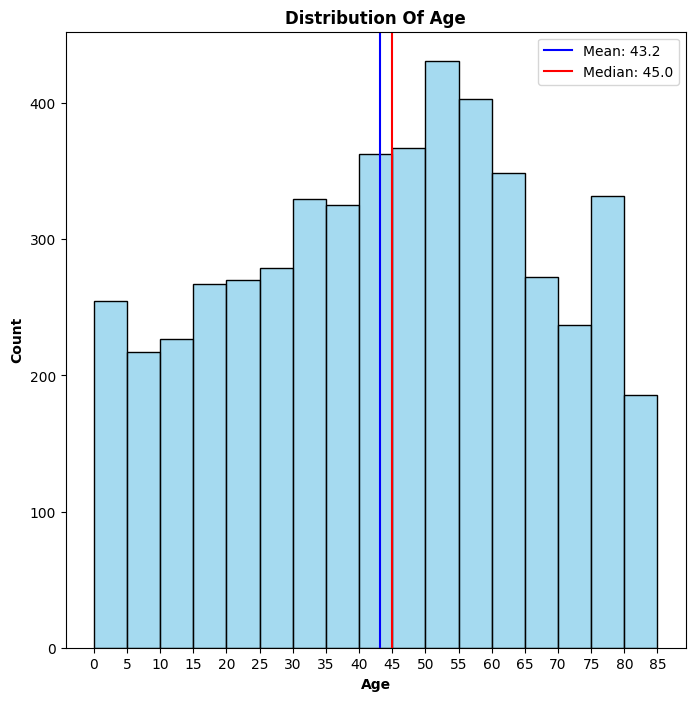

In [721]:
histogram_plot(data['age'], title='Distribution Of Age', xlabel='Age', ylabel='Count', mean_line=True, median_line=True, color='skyblue', bins=range(int(age_min), int(age_max + 5),5))

&rarr; The distribution of ages are relatively even

+ Probability Density

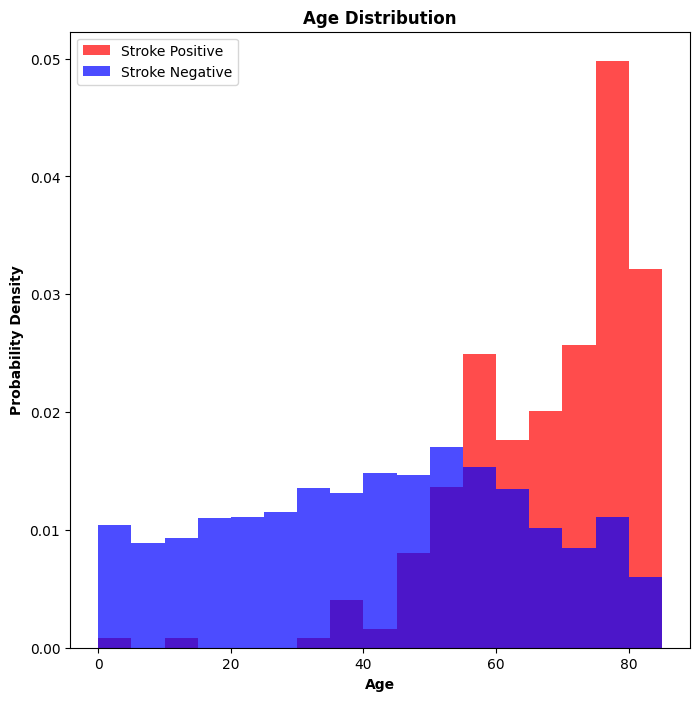

In [722]:
density_plot(data, col1='age', col2='stroke', label1='Stroke Positive', label2='Stroke Negative', title = 'Age Distribution', xlabel='Age', ylabel='Probability Density', bins=range(int(age_min), int(age_max + 5),5))

&rarr; We clearly see that the older people get, the more likely conveyed people get stroke. <br>
&rarr; **This piece of information is important for predicting stroke**

<h4>Average Glucose Level Column</h4>

+ Did you know : Chemical formula for Glucose is C6H12O6

In [723]:
glu_mean = data['avg_glucose_level'].mean()
glu_median = data['avg_glucose_level'].median()
glu_min = data['avg_glucose_level'].min()
glu_max = data['avg_glucose_level'].max()
glu_std = data['avg_glucose_level'].std()

print(f"Mean glucose level: {glu_mean}")
print(f"Median glucose level: {glu_median}")
print(f"Min glucose level: {glu_min}")
print(f"Max glucose level: {glu_max}")
print(f"Standard deviation of glucose level: {glu_std}")

Mean glucose level: 106.1476771037182
Median glucose level: 91.88499999999999
Min glucose level: 55.12
Max glucose level: 271.74
Standard deviation of glucose level: 45.28356015058198


* The percentage of missing values

In [724]:
print("Percentage of missing values in glucose level: ", (data['avg_glucose_level'].isnull().sum() / len(data['avg_glucose_level']))*100)

Percentage of missing values in glucose level:  0.0


+ No negative or missing value detected<br>
&rarr; Not Abnormal

+ Glucose level distribution

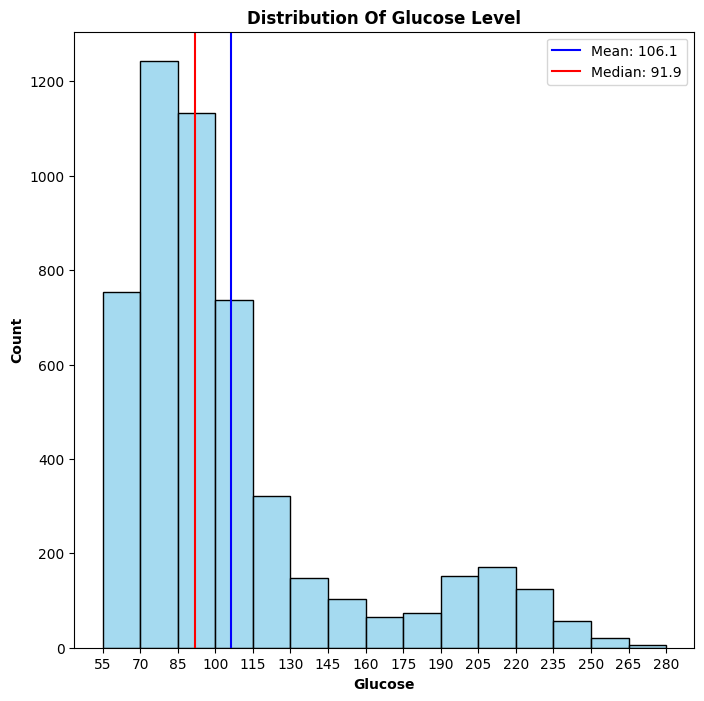

In [725]:
histogram_plot(data['avg_glucose_level'], title='Distribution Of Glucose Level', xlabel='Glucose', ylabel='Count', mean_line=True, median_line=True, color='skyblue', bins=range(int(glu_min), int(glu_max + 15),15))

&rarr; The distribution of glucose level is skewed in positive direction, with most value come from the range of 55 to 115 </br>
&rarr; **The majority of individuals have relatively lower glucose levels. However, there is a significant number of individuals with higher glucose levels, contributing to the positive skew. This distribution could be indicative of a population with a mix of healthy individuals and those with potential glucose regulation issues**

+ Probability Density

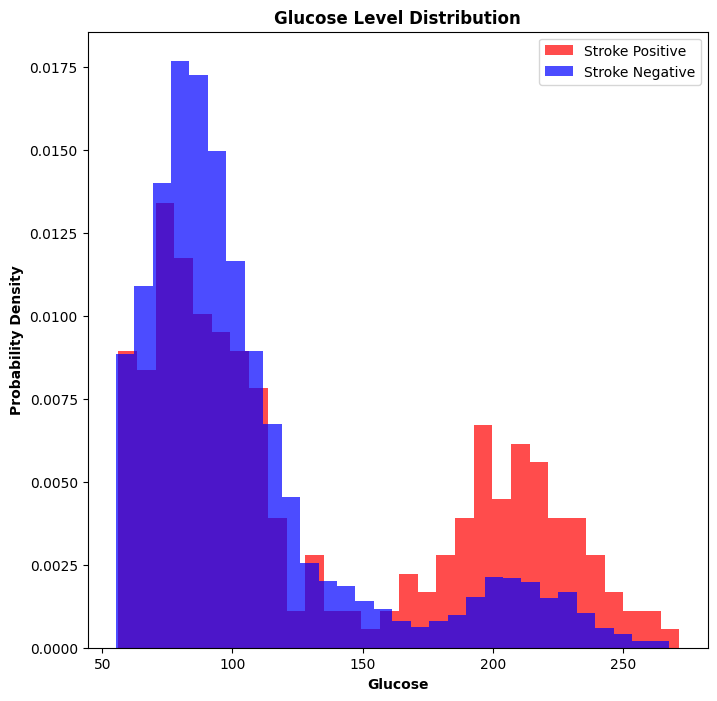

In [726]:
density_plot(data, col1='avg_glucose_level', col2='stroke', label1='Stroke Positive', label2='Stroke Negative', title = 'Glucose Level Distribution', xlabel='Glucose', ylabel='Probability Density', bins=30)

&rarr; Something happens when we follow the Glucose level as it raise from 150 to 250. We notice that stroke possibility is significantly more than no stroke </br>
&rarr; Both groups exhibit a positively skewed distribution. This means that there are more individuals with lower glucose levels compared to higher ones </br>
&rarr; **The histogram suggests that individuals with a history of stroke have a higher proportion of individuals with higher glucose levels**

<h4> BMI Column </h4>

+ Descriptive Statistic

In [727]:
bmi_mean = data['bmi'].mean()
bmi_median = data['bmi'].median()
bmi_min = data['bmi'].min()
bmi_max = data['bmi'].max()
bmi_std = data['bmi'].std()

# Print the results
print(f"Mean BMI: {bmi_mean}")
print(f"Median BMI: {bmi_median}")
print(f"Min BMI: {bmi_min}")
print(f"Max BMI: {bmi_max}")
print(f"Standard deviation of BMI: {bmi_std}")

Mean BMI: 28.893236911794666
Median BMI: 28.1
Min BMI: 10.3
Max BMI: 97.6
Standard deviation of BMI: 7.854066729680164


+ No negative value<br>
&rarr; Not Abnormal

+ Value Distribution

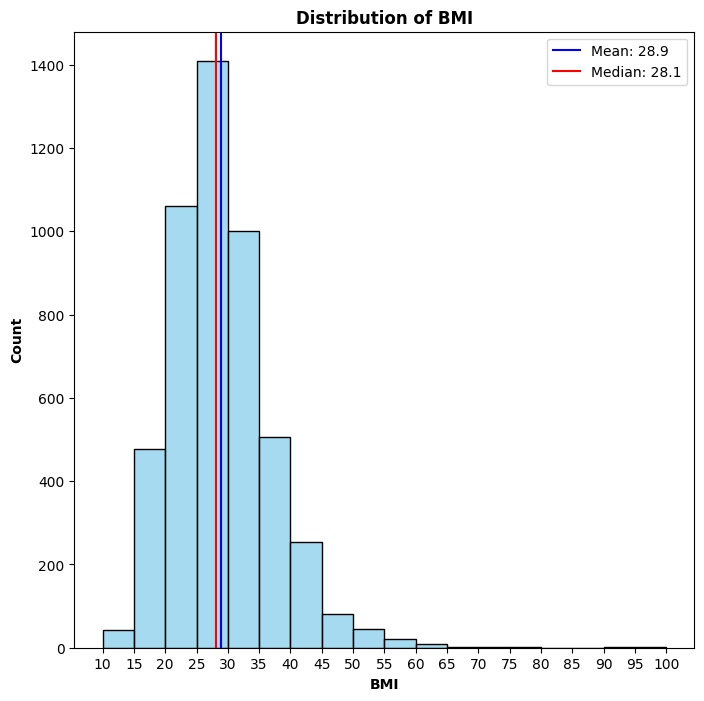

In [728]:
histogram_plot(data['bmi'], title='Distribution of BMI', xlabel='BMI', ylabel='Count', mean_line=True, median_line=True, color='skyblue', bins=range(int(bmi_min), int(bmi_max + 5), 5))


&rarr; The BMI distribution is **positively skewed** in positive direction with most values come from the range of 15 to 45. However, there are some outliers at the range of 90-100, those may cause noise <br>
&rarr; **The histogram suggests that the majority of individuals in this dataset have a BMI in the overweight range. However, there is a significant number of individuals with higher BMI values, contributing to the positive skew. This distribution could be indicative of a population with a high prevalence of overweight and obesity**

+ Probability Density

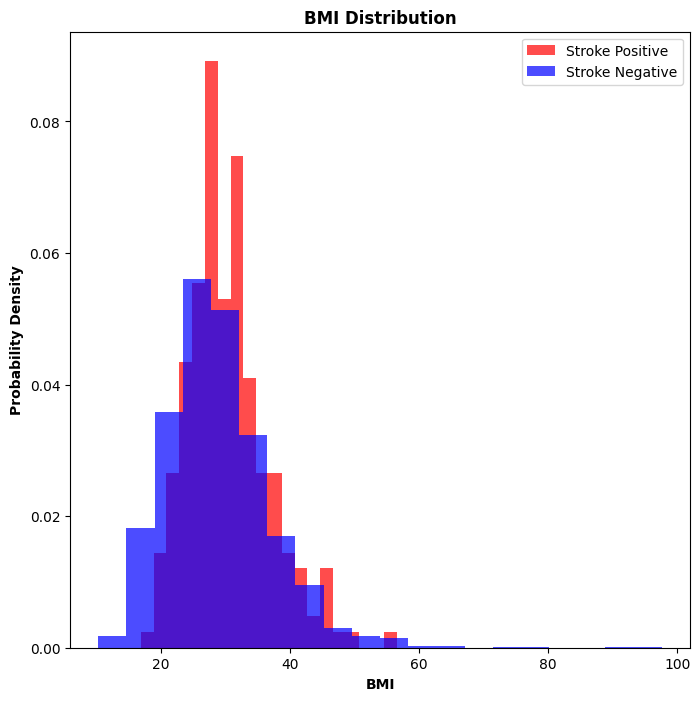

In [729]:
density_plot(data, col1='bmi', col2='stroke', label1='Stroke Positive', label2='Stroke Negative', title='BMI Distribution', xlabel='BMI', ylabel='Probability Density', bins=20)


&rarr; Both Stoke Positive and Negative have the BMI value distributed evenly, the probability get very high at the range 20-40, especially for Stroke Positive<br>
&rarr; Both groups exhibit a positively skewed distribution<br>
&rarr; **The observed difference in BMI distribution between the two groups raises the possibility of an association between higher BMI and the risk of stroke**

<h3>Categorical columns exploration</h3>

<h4>Gender Column</h4>

- Distribution of values

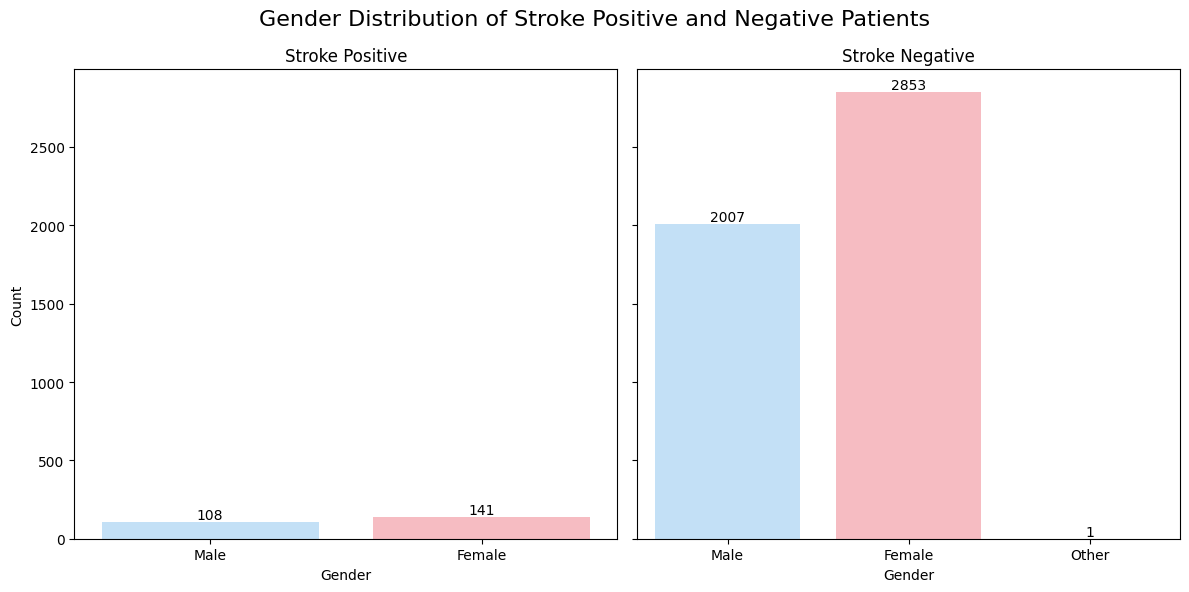

In [730]:
stroke_positive = data[data['stroke'] == 1]
stroke_negative = data[data['stroke'] == 0]

pastel_colors = ['#bae1ff', '#ffb3ba', '#baffc9']

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.countplot(x='gender', hue='gender', data=stroke_positive, palette=pastel_colors[:2], ax=axes[0], legend=False)
axes[0].set_title('Stroke Positive')
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Count")

for p in axes[0].patches:
    axes[0].text(p.get_x() + p.get_width() / 2., p.get_height(), 
                 int(p.get_height()), ha='center', va='bottom')

sns.countplot(x='gender', hue='gender', data=stroke_negative, palette=pastel_colors, ax=axes[1], legend=False)
axes[1].set_title('Stroke Negative')
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Count")

for p in axes[1].patches:
    axes[1].text(p.get_x() + p.get_width() / 2., p.get_height(), 
                 int(p.get_height()), ha='center', va='bottom')

plt.suptitle("Gender Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.tight_layout()
plt.show()

- Percentage of missing values

In [731]:
print("Percentage of missing values in gender: ", (data['gender'].isnull().sum() / len(data)) * 100)

Percentage of missing values in gender:  0.0


- Different values

In [732]:
print("Number of different gender: ", len(data['gender'].unique()))
print("Different genders: ", data['gender'].unique())

Number of different gender:  3
Different genders:  ['Male' 'Female' 'Other']


- <b>Abnormal</b>: 'Other' gender has only one record, which can be the outliner element. We can remove it from the dataset without causing any problem.

&rarr; <b>Gender seems not to be a risk factor</b>: The visual data reveals that the male-to-female ratio in the stroke-positive plot closely mirrors that of the stroke-negative plot.

<h4>Hypertension Column</h4>

- Distribution of values

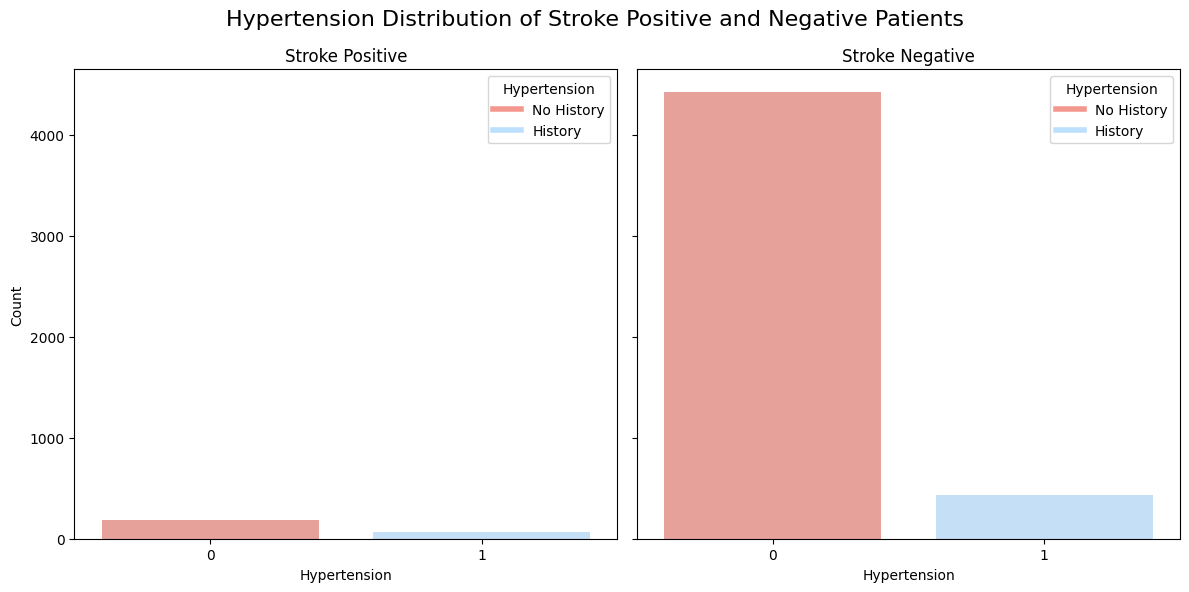

In [733]:
# Hypertension
stroke_positive = data[data['stroke'] == 1]
stroke_negative = data[data['stroke'] == 0]

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plotting Hypertension Distribution for Stroke Positive patients
sns.countplot(x='hypertension', hue='hypertension', palette=['#f4978e', '#bde0fe'], data=stroke_positive, ax=axes[0], legend=False)
axes[0].set_title('Stroke Positive')
axes[0].set_xlabel('Hypertension')
axes[0].set_ylabel('Count')

# Create a custom legend for the Stroke Positive plot
handles_positive = [plt.Line2D([0], [0], color="#f4978e", lw=4),
                    plt.Line2D([0], [0], color="#bde0fe", lw=4)]
axes[0].legend(handles_positive, ['No History', 'History'], title='Hypertension')

# Plotting Hypertension Distribution for Stroke Negative patients
sns.countplot(x='hypertension', hue='hypertension', palette=['#f4978e', '#bde0fe'], data=stroke_negative, ax=axes[1], legend=False)
axes[1].set_title('Stroke Negative')
axes[1].set_xlabel('Hypertension')

# Create a custom legend for the Stroke Negative plot
handles_negative = [plt.Line2D([0], [0], color="#f4978e", lw=4),
                    plt.Line2D([0], [0], color="#bde0fe", lw=4)]
axes[1].legend(handles_negative, ['No History', 'History'], title='Hypertension')

# Set the main title
plt.suptitle("Hypertension Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()


- Percentage of missing values

In [734]:
print("Percentage of missing values in hypertension: ", (data['hypertension'].isnull().sum() / len(data)) * 100)

Percentage of missing values in hypertension:  0.0


&rarr; In both stroke-positive and stroke-negative populations, **hypertension is not overwhelmingly present**. Most patients, regardless of stroke status, do not have a history of hypertension. However, it is important to note that patients with a history of hypertension are more common in the stroke-negative group

&rarr; **Hypertension does not appear to be the sole or dominant factor contributing to stroke**

<h4>Heart Disease Column</h4>

- Distribution of values

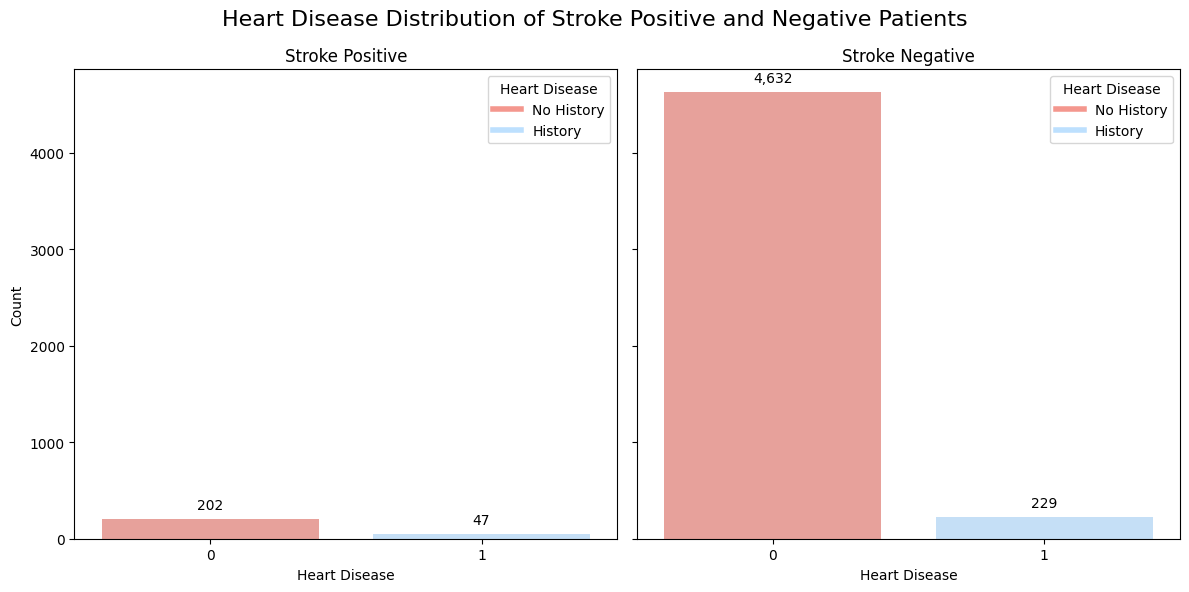

In [735]:
# Hypertension
stroke_positive = data[data['stroke'] == 1]
stroke_negative = data[data['stroke'] == 0]

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plotting Hypertension Distribution for Stroke Positive patients
sns.countplot(x='heart_disease', hue='heart_disease',palette=['#f4978e', '#bde0fe'], data=stroke_positive, ax=axes[0], legend=False)
axes[0].set_title('Stroke Positive')
axes[0].set_xlabel('Heart Disease')
axes[0].set_ylabel('Count')

# Create a custom legend for the Stroke Positive plot
handles_positive = [plt.Line2D([0], [0], color="#f4978e", lw=4),
                    plt.Line2D([0], [0], color="#bde0fe", lw=4)]
axes[0].legend(handles_positive, ['No History', 'History'], title='Heart Disease')

# Plotting Hypertension Distribution for Stroke Negative patients
sns.countplot(x='heart_disease', hue='heart_disease', palette=['#f4978e', '#bde0fe'], data=stroke_negative, ax=axes[1], legend=False)
axes[1].set_title('Stroke Negative')
axes[1].set_xlabel('Heart Disease')

# Create a custom legend for the Stroke Negative plot
handles_negative = [plt.Line2D([0], [0], color="#f4978e", lw=4),
                    plt.Line2D([0], [0], color="#bde0fe", lw=4)]
axes[1].legend(handles_negative, ['No History', 'History'], title='Heart Disease')

# Put values on top of the bars
for p in axes[0].patches:
    axes[0].annotate(format(int(p.get_height()), ','), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
for p in axes[1].patches:
    axes[1].annotate(format(int(p.get_height()), ','), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
# Set the main title
plt.suptitle("Heart Disease Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()


- Percentage of missing values

In [736]:
print("Percentage of missing values in heart disease: ", (data['heart_disease'].isnull().sum() / len(data)) * 100)

Percentage of missing values in heart disease:  0.0


- Different values

In [737]:
print("Number of different heart_disease: ", len(data['heart_disease'].unique()))
print("Different heart_disease: ", data['heart_disease'].unique())

Number of different heart_disease:  2
Different heart_disease:  [1 0]


&rarr; Both stroke-positive and stroke-negative patients are more likely to have no history of heart disease. However, the proportion of stroke-positive patients with heart disease history is higher than that of stroke-negative patients, indicating **a possible association between heart disease history and stroke risk**

<h4>Ever Married Column</h4>

- Distribution of values

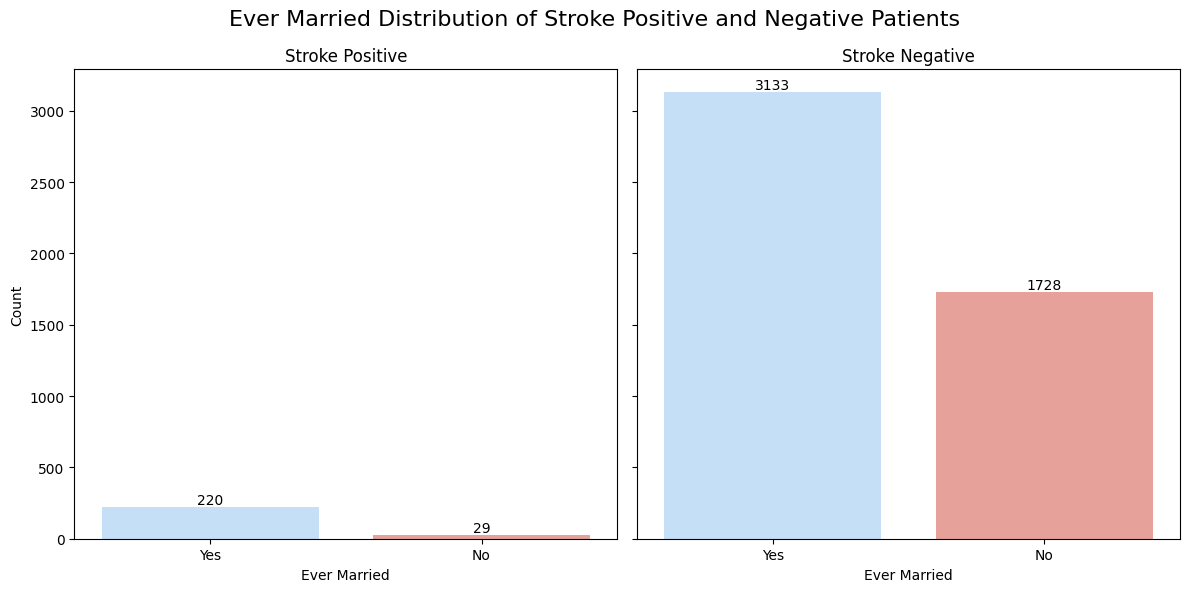

In [738]:
stroke_positive = data[data['stroke'] == 1]
stroke_negative = data[data['stroke'] == 0]

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.countplot(x='ever_married', hue='ever_married', data=stroke_positive, palette=['#bde0fe', '#f4978e'], ax=axes[0], legend=False, order=['Yes', 'No'])
axes[0].set_title('Stroke Positive')
axes[0].set_xlabel("Ever Married")
axes[0].set_ylabel("Count")

for p in axes[0].patches:
    axes[0].text(p.get_x() + p.get_width() / 2., p.get_height(), 
                 int(p.get_height()), ha='center', va='bottom')

sns.countplot(x='ever_married', hue='ever_married', data=stroke_negative, palette=['#f4978e', '#bde0fe'], ax=axes[1], legend=False, order=['Yes', 'No'])
axes[1].set_title('Stroke Negative')
axes[1].set_xlabel("Ever Married") 
axes[1].set_ylabel("Count")

for p in axes[1].patches:
    axes[1].text(p.get_x() + p.get_width() / 2., p.get_height(), 
                 int(p.get_height()), ha='center', va='bottom')

plt.suptitle("Ever Married Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.tight_layout()
plt.show()

- Percentage of missing values

In [739]:
print("Percentage of missing values in ever_married: ", (data['ever_married'].isnull().sum() / len(data)) * 100)

Percentage of missing values in ever_married:  0.0


- Different values

In [740]:
print("Number of different ever_married: ", len(data['ever_married'].unique()))
print("Different ever_married: ", data['ever_married'].unique())

Number of different ever_married:  2
Different ever_married:  ['Yes' 'No']


&rarr; <b>Nothing seems abnormal</b>

&rarr; <b>"Ever Married" could be a risk factor</b>: The visual data indicates that the likelihood of stroke is significantly higher among married individuals compared to those who are unmarried.

<h4>Work Type Column</h4>

- Distribution of values

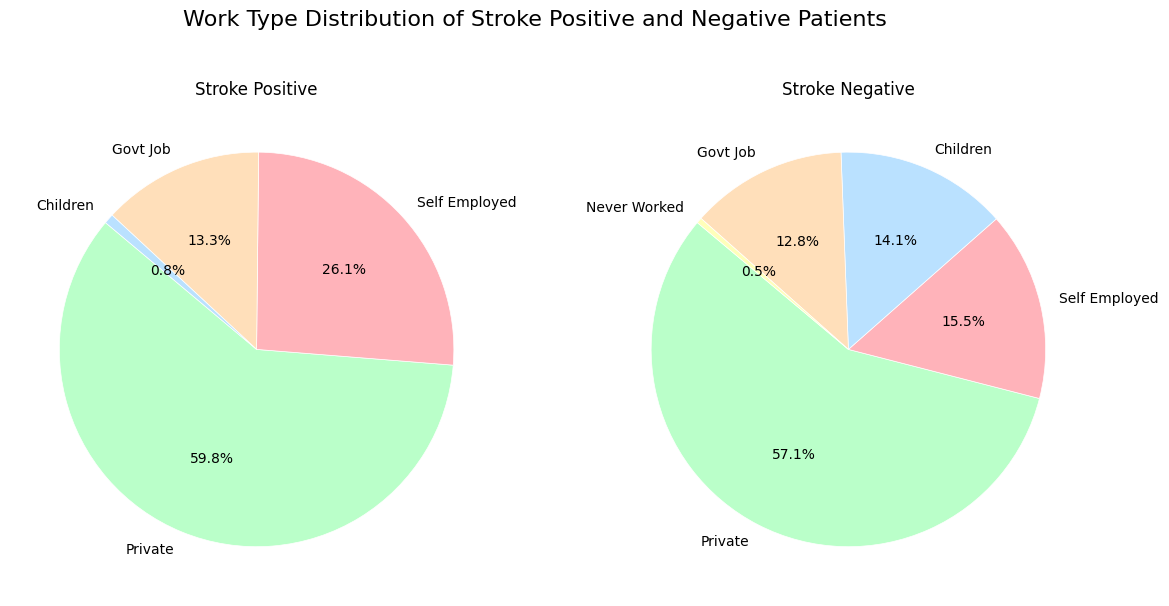

In [741]:
stroke_positive_counts = stroke_positive['work_type'].value_counts(normalize=True) * 100
stroke_negative_counts = stroke_negative['work_type'].value_counts(normalize=True) * 100

pos_labels = ['Private', 'Self Employed', 'Govt Job', 'Children']
neg_labels = ['Private', 'Self Employed', 'Children', 'Govt Job', 'Never Worked']


colors = {
    'Children': '#bae1ff',
    'Govt Job': '#ffdfba',
    'Never Worked': '#ffffba',
    'Private': '#baffc9',
    'Self Employed': '#ffb3ba'
}

pos_colors = [colors[label] for label in pos_labels]
neg_colors = [colors[label] for label in neg_labels]

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].pie(stroke_positive_counts, labels=pos_labels, autopct='%1.1f%%', colors=pos_colors, startangle=140, wedgeprops={'edgecolor': 'white', 'linewidth': 0.5})
axes[0].set_title("Stroke Positive")

axes[1].pie(stroke_negative_counts, labels=neg_labels, autopct='%1.1f%%', colors=neg_colors, startangle=140, wedgeprops={'edgecolor': 'white', 'linewidth': 0.5})
axes[1].set_title("Stroke Negative")

plt.suptitle("Work Type Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.show()

- Percentage of missing values

In [742]:
print("Percentage of missing values in work_type: ", (data['work_type'].isnull().sum() / len(data)) * 100)

Percentage of missing values in work_type:  0.0


- Different values

In [743]:
print("Number of different work_type: ", len(data['work_type'].unique()))
print("Different work_type: ", data['work_type'].unique())

Number of different work_type:  5
Different work_type:  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


&rarr; <b>Nothing seems abnormal</b>

&rarr; <b>Work Type could be a risk factor</b>:
-  <b>Self-employed people have a high rate of having a stroke</b>: The visual data reveals a higher proportion of self-employed individuals in the stroke-positive plot compared to the stroke-negative plot.
-  <b>Children have a very low risk of having a stroke</b>: The visual data shows that children make up a very small proportion in the stroke-positive plot, at less than 1%, whereas in the stroke-negative plot, they account for up to 14.1%.

<h4>Residence Type Column</h4>

- Distribution of values

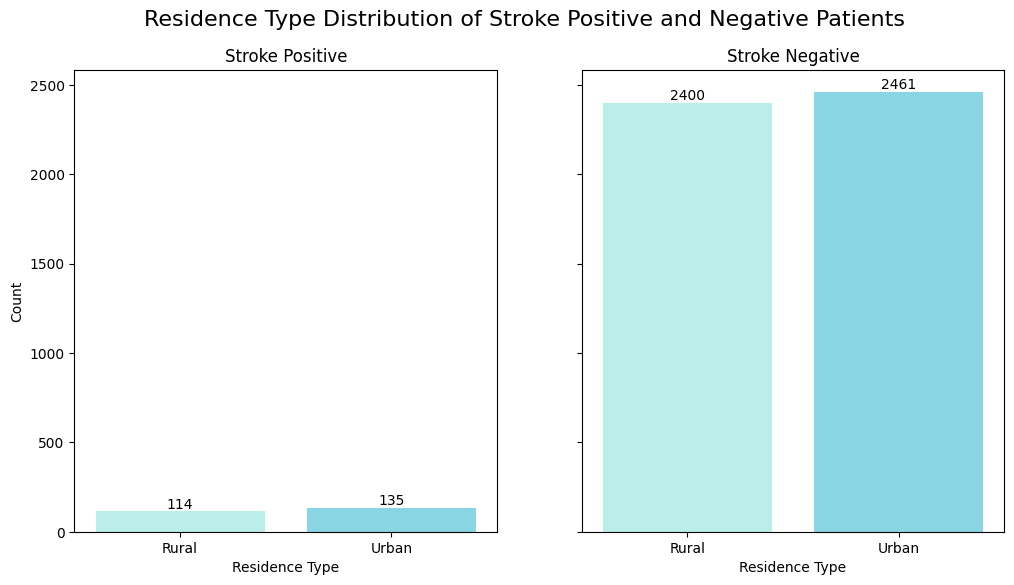

In [744]:
stroke_positive = data[data['stroke'] == 1]
stroke_negative = data[data['stroke'] == 0]

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
sns.countplot(x='Residence_type', hue='Residence_type', data=stroke_positive, palette=['#7bdff2', '#b2f7ef'], ax=axes[0], legend=False, order=['Rural', 'Urban'])
axes[0].set_title('Stroke Positive')
axes[0].set_xlabel("Residence Type")
axes[0].set_ylabel("Count")

for p in axes[0].patches:
    axes[0].text(p.get_x() + p.get_width() / 2., p.get_height(), 
                 int(p.get_height()), ha='center', va='bottom')

sns.countplot(x='Residence_type', hue='Residence_type', data=stroke_negative, palette=['#b2f7ef', '#7bdff2'], ax=axes[1], legend=False, order=['Rural', 'Urban'])
axes[1].set_title('Stroke Negative')
axes[1].set_xlabel("Residence Type") 
axes[1].set_ylabel("Count")

for p in axes[1].patches:
    axes[1].text(p.get_x() + p.get_width() / 2., p.get_height(), 
                 int(p.get_height()), ha='center', va='bottom')

plt.suptitle("Residence Type Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.show()

- Percentage of missing values

In [745]:
print("Percentage of missing values in Residence_type: ", (data['Residence_type'].isnull().sum() / len(data)) * 100)

Percentage of missing values in Residence_type:  0.0


- Different values

In [746]:
print("Number of different Residence_type: ", len(data['Residence_type'].unique()))
print("Different Residence_type: ", data['Residence_type'].unique())

Number of different Residence_type:  2
Different Residence_type:  ['Urban' 'Rural']


&rarr; <b>Nothing seems abnormal</b>

&rarr; <b>Residence Type seems not to be a risk factor</b>: The rate of stroke among people living in urban areas is strikingly similar to that of those living in rural areas.

<h4>Smoking Status Column</h4>

- Distribution of values

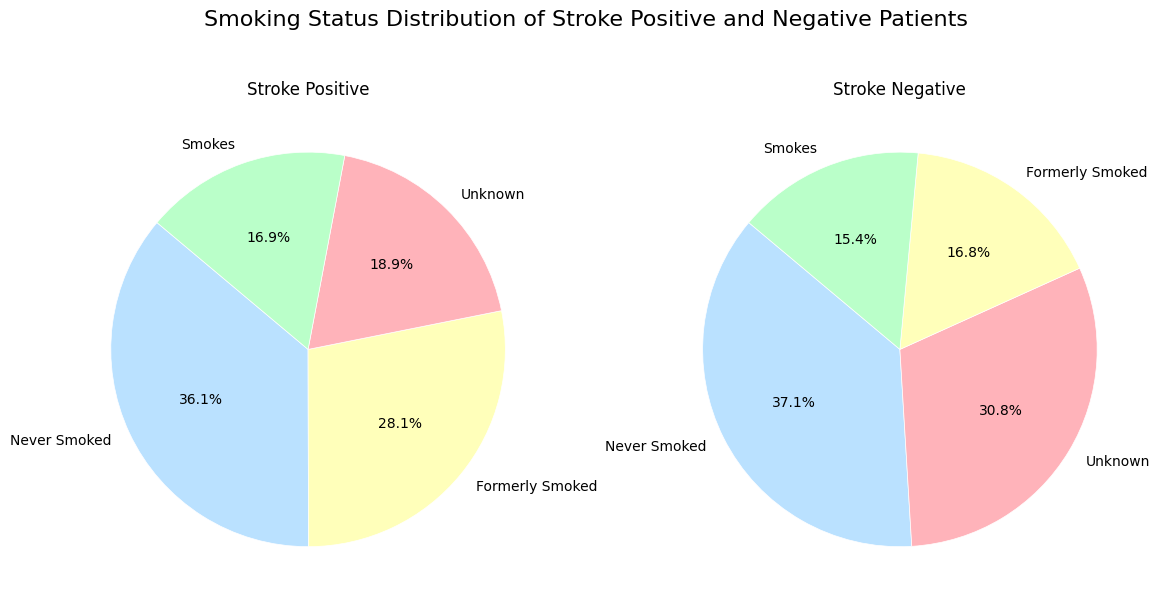

In [747]:
stroke_positive_counts = stroke_positive['smoking_status'].value_counts(normalize=True) * 100
stroke_negative_counts = stroke_negative['smoking_status'].value_counts(normalize=True) * 100

pos_labels = ['Never Smoked', 'Formerly Smoked', 'Unknown', 'Smokes']
neg_labels = ['Never Smoked', 'Unknown', 'Formerly Smoked', 'Smokes']

colors = {
    'Never Smoked': '#bae1ff',
    'Formerly Smoked': '#ffffba',
    'Smokes': '#baffc9',
    'Unknown': '#ffb3ba'
}

pos_colors = [colors[label] for label in pos_labels]
neg_colors = [colors[label] for label in neg_labels]

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].pie(stroke_positive_counts, labels=pos_labels, autopct='%1.1f%%', colors=pos_colors, startangle=140, wedgeprops={'edgecolor': 'white', 'linewidth': 0.5})
axes[0].set_title("Stroke Positive")

axes[1].pie(stroke_negative_counts, labels=neg_labels, autopct='%1.1f%%', colors=neg_colors, startangle=140, wedgeprops={'edgecolor': 'white', 'linewidth': 0.5})
axes[1].set_title("Stroke Negative")

plt.suptitle("Smoking Status Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.show()

- Percentage of missing values

In [748]:
print("Percentage of missing values in smoking_status: ", (data['smoking_status'].isnull().sum() / len(data)) * 100)

Percentage of missing values in smoking_status:  0.0


- Different values

In [749]:
print("Number of different smoking_status: ", len(data['smoking_status'].unique()))
print("Different smoking_status: ", data['smoking_status'].unique())

Number of different smoking_status:  4
Different smoking_status:  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


&rarr; <b>Nothing seems abnormal</b>

&rarr; <b>Smoking status could be a risk factor:</b>
- <b>Individuals who have a history of smoking or are currently smokers face a greater risk of experiencing a stroke</b>: The proportion of individuals who have smoked or are current smokers is greater in the stroke-positive plot compared to the stroke-negative plot.
- <b>Non-smokers have a lower incidence of stroke</b>: The proportion of non-smokers in the stroke-positive plot is lower than that in the stroke-negative plot.

<div id = "preprocessing"><h2>3. Preprocessing data </h2></div>

<h3> Categorial Encoder </h3>

In [750]:
# Drop id column
data = data.drop('id', axis=1)
# Encoding categorical data

gender_dict = {'Male' : 0, 'Female' : 1, 'Other' : 2}
married_dict = {'No' : 0, 'Yes' : 1}
work_type_dict = {'children' : 0, 'Never_worked' : 1, 'Govt_job' : 2, 'Private' : 3, 'Self-employed':4}
residence_type_dict = {'Rural' : 0, 'Urban' : 1}
smoking_dict = {'Unknown' : 0, 'never smoked' : 1, 'formerly smoked' : 2, 'smokes' : 3}

def category_encoder(label, value_dict):
    if label in value_dict:
        return value_dict[label]
    else:
        return -1

data['gender'] = data['gender'].apply(category_encoder, args=(gender_dict,))
data['ever_married'] = data['ever_married'].apply(category_encoder, args=(married_dict,))
data['work_type'] = data['work_type'].apply(category_encoder, args=(work_type_dict,))
data['Residence_type'] = data['Residence_type'].apply(category_encoder, args=(residence_type_dict,))
data['smoking_status'] = data['smoking_status'].apply(category_encoder,args=(smoking_dict,))

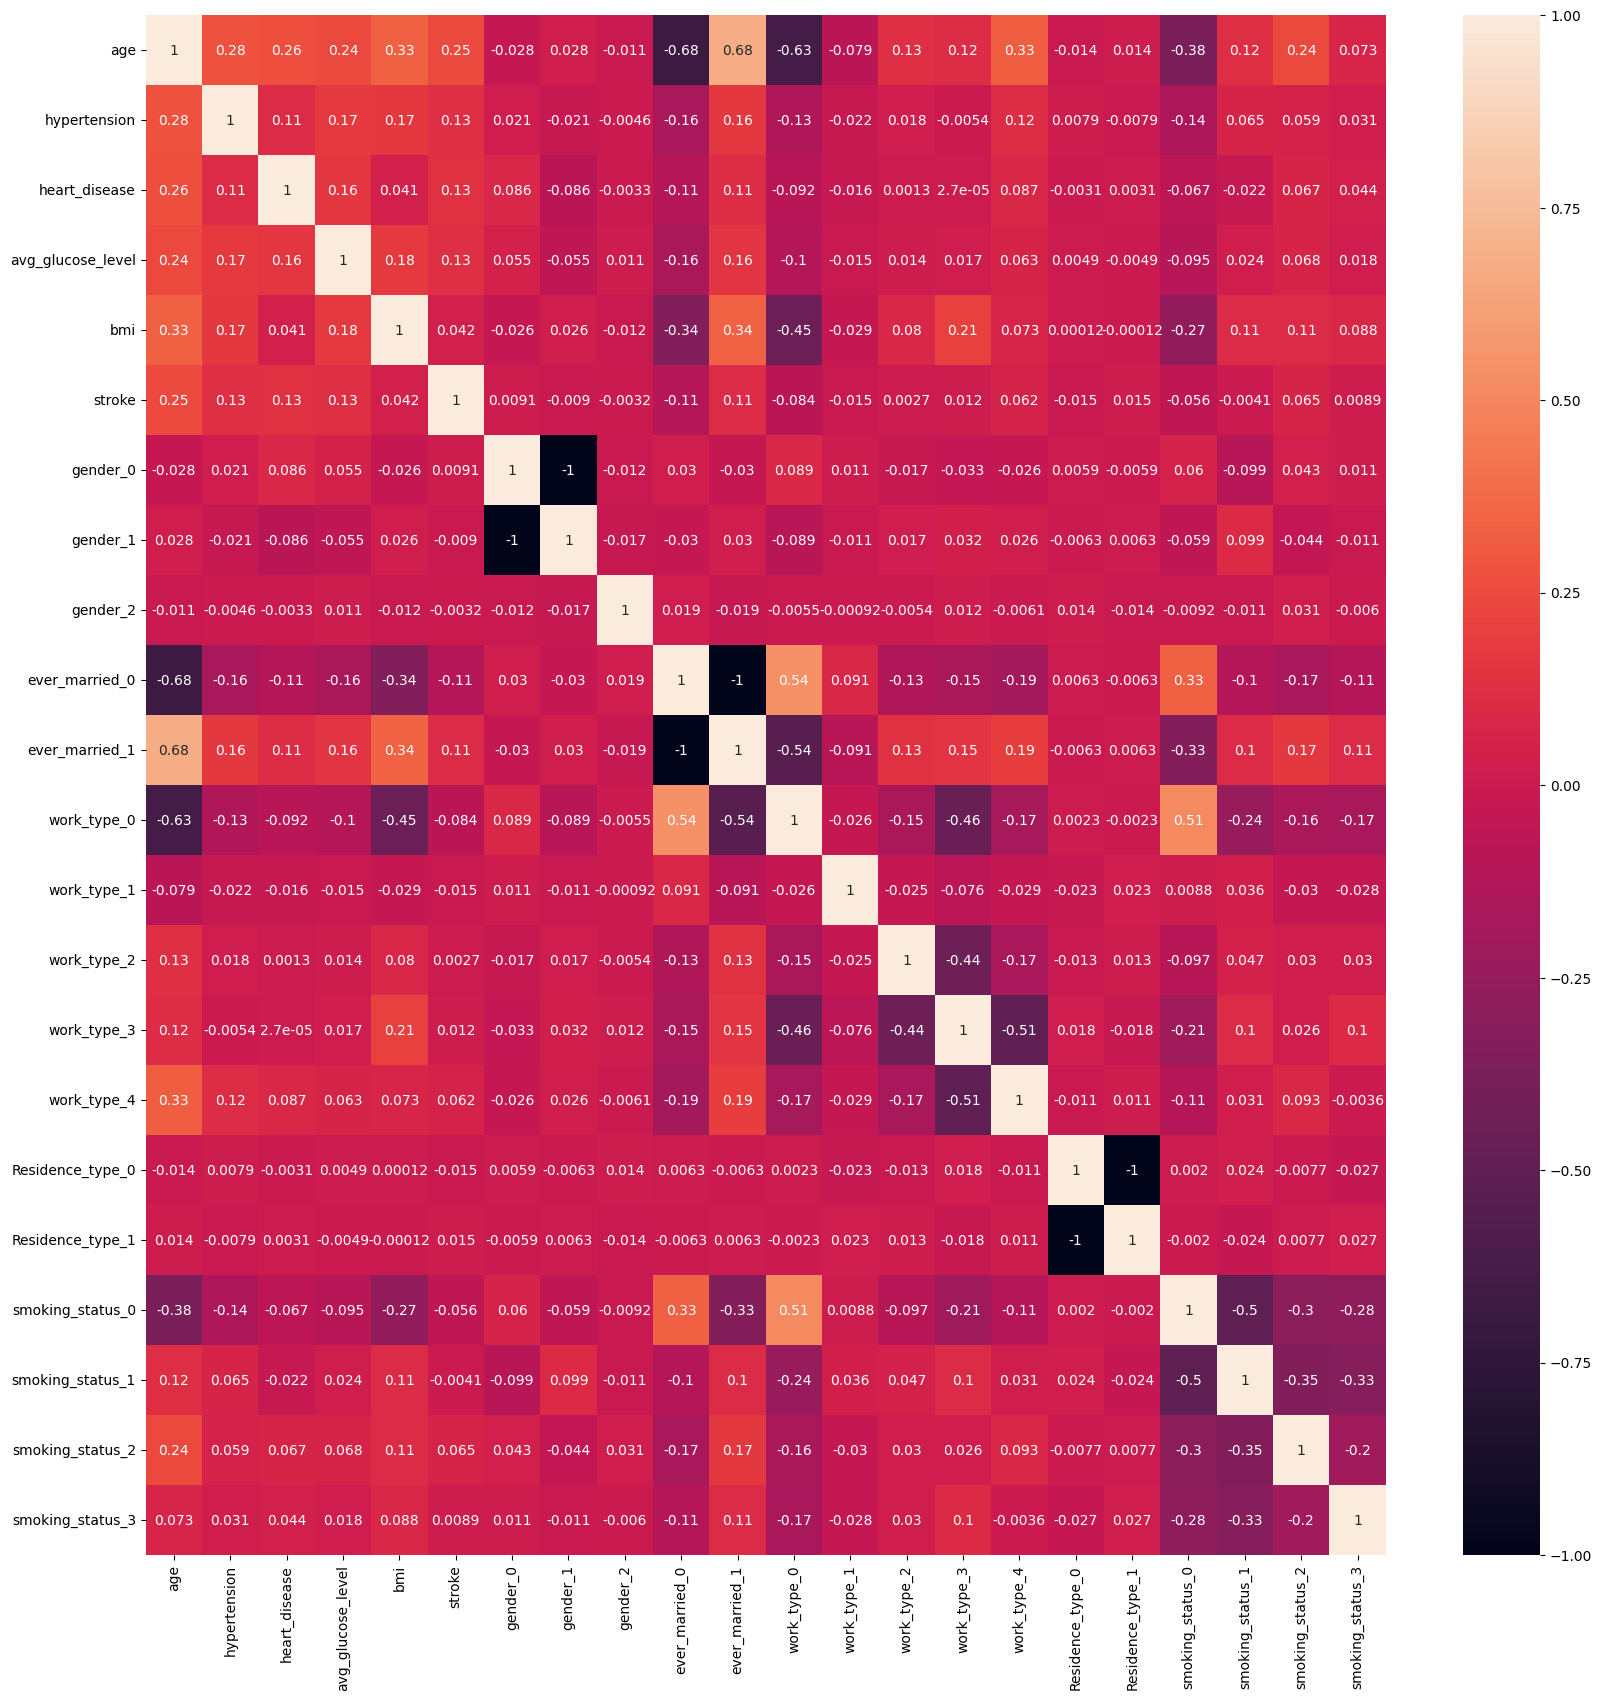

In [751]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# List of categorical columns
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Apply OneHotEncoder to the categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
data_encoded = pd.DataFrame(encoder.fit_transform(data[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

# Combine the encoded data with the original data
data_tmp = data.drop(categorical_cols, axis=1).reset_index(drop=True)
data_tmp = pd.concat([data_tmp, data_encoded], axis=1)

# Plot the correlation heatmap
plt.figure(figsize=(20, 20))
corr = data_tmp.corr()
sns.heatmap(corr, annot=True)
plt.show()


In [763]:
train_columns = [1,11,5]


data_copy = data_tmp[data_tmp['bmi'].notnull()].copy()

data_copy = data_copy.sample(frac=1).reset_index(drop=True)

X = data_copy.iloc[:, train_columns].values
y = data_copy.iloc[:, 9].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def scaleDataset(X):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X

X_train = scaleDataset(X_train)
X_test = scaleDataset(X_test)


decision_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regression Model Report : ")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score (R²): {r2:.2f}")

Regression Model Report : 
Mean Absolute Error (MAE): 0.30
Mean Squared Error (MSE): 0.15
R2 Score (R²): 0.34


<h3> Handle Missing Value </h3>


+ We can use **Decision Tree strategy** to fill in missing value, because as above analysis, the missing values in **bmi** column is **MAR**, which means using associated features (e.g., through predictive imputation) is likely to provide better accuracy than simply replacing missing values with the mean or median

<Axes: >

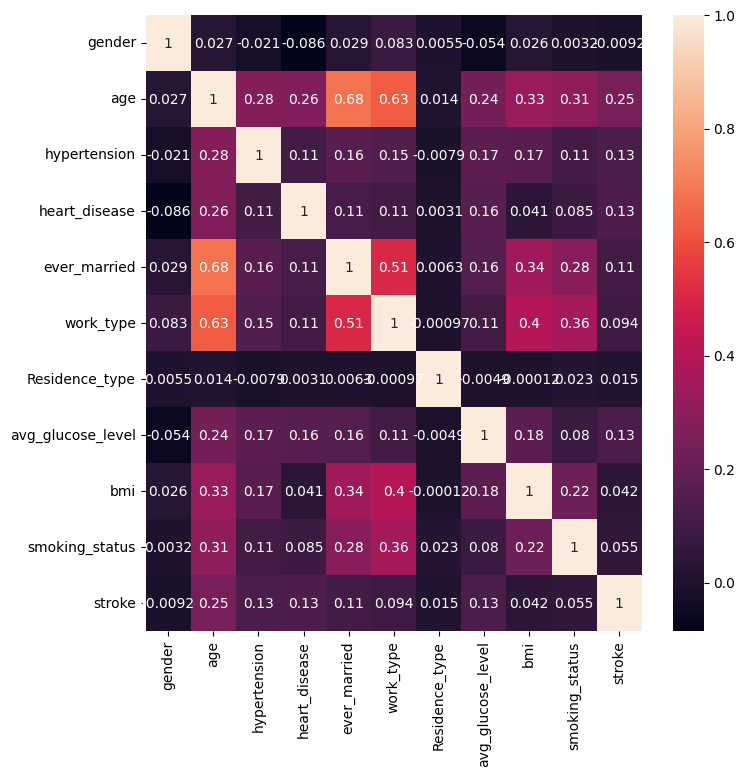

In [753]:
# Check correlation between features
plt.figure(figsize=(8,8))
corr = data.corr()
sns.heatmap(corr, annot=True)

- As can be seen that, **age, hypertension, ever_married and work_type** have the highest correlation rate with **bmi**, therefore, we will pick these 3 features for **Decision Tree Regressor**

In [754]:
# train_columns = [1,2,3,4,5,6,7,8,10,11]

train_columns = [2,5,6]


data_copy = data[data['bmi'].notnull()].copy()

data_copy = data_copy.sample(frac=1).reset_index(drop=True)

X = data_copy.iloc[:, train_columns].values
y = data_copy.iloc[:, 9].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [755]:
def scaleDataset(X):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X

X_train = scaleDataset(X_train)
X_test = scaleDataset(X_test)


In [756]:

decision_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)


In [757]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regression Model Report : ")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score (R²): {r2:.2f}")

Regression Model Report : 
Mean Absolute Error (MAE): 0.76
Mean Squared Error (MSE): 0.88
R2 Score (R²): 0.17


&rarr; This strategy give better result than using Mean strategy

+ We start fill in missing value with output predicted by our model

In [758]:
missing_idx = data[data['bmi'].isnull()].index

for i in missing_idx:
    X_i = data.iloc[i, train_columns].values
    X_i = scaleDataset(X_i[:, np.newaxis]).reshape(1,-1)
    y_pred = decision_tree.predict(X_i)
    data.loc[i, 'bmi'] = y_pred

In [759]:
data['bmi'].isnull().sum()

0

&rarr; Phew!!, No more missing value

<div id = "questions"> <h2> 4. Questions </h2> </div>

<div id = "question-1"> <h3>4.1. Question 1 </h3></div>

<div id = "question-2"> <h3>4.2. Question 2 </h3></div>

<div id = "question-3"> <h3>4.3. Question 3 </h3></div>

<div id = "conclusion"> <h2> 5. Conclusion </h2> </div>

<div id = "difficulties"> <h3>5.1. Difficulties during the project </h3></div>

<div id = "useful"> <h3>5.2. Useful things learned</h3></div>

<div id = "plans"> <h3>5.3. Plans to improve if have more time</h3></div>

<div id = "references"> <h2>6. References</h2></div>